In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer
import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle
from tqdm import tqdm
import os
#import chart_studio.plotly
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter
from scipy.sparse import hstack,vstack
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import model_selection
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
from prettytable import PrettyTable
from sklearn.preprocessing import Normalizer
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
import pdb
from sklearn.preprocessing import LabelEncoder
import graphviz
from sklearn import tree
from graphviz import Source
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
from sklearn.preprocessing import StandardScaler
# Credits: https://machinelearningmastery.com/sequence-classification-lstm-recurrent-neural-networks-python-keras/
# LSTM for sequence classification in the IMDB dataset
import numpy
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers.embeddings import Embedding
from keras.layers import Flatten
from keras.layers import concatenate,Reshape

from keras.layers import Dropout
from keras.layers import BatchNormalization
from keras.layers import Input
from keras.layers import CuDNNLSTM
from keras.preprocessing import sequence
from keras.initializers import he_normal,glorot_normal
# fix random seed for reproducibility
numpy.random.seed(7)
from numpy import array
from numpy import asarray
from numpy import zeros
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Model
from keras.utils.vis_utils import plot_model

%tensorflow_version 1.x
from keras.callbacks import *
import keras
from tensorboardcolab import *
from keras.regularizers import l2
import keras.backend as K
import tensorflow as tf
from keras.utils.np_utils import to_categorical
from keras.layers import Reshape
from keras.layers import LeakyReLU, MaxPooling1D
from keras.layers.convolutional import Conv1D


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Using TensorFlow backend.


In [0]:
!pip show tensorflow

Name: tensorflow
Version: 1.15.2
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /tensorflow-1.15.2/python3.6
Requires: wheel, tensorboard, google-pasta, protobuf, astor, opt-einsum, termcolor, wrapt, absl-py, keras-preprocessing, six, gast, grpcio, tensorflow-estimator, numpy, keras-applications
Required-by: stable-baselines, magenta, fancyimpute


In [0]:
Project_data = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/preprocessed_data.csv')
#Project_data=Project_data[0:5000]
print(Project_data.shape)

(109248, 9)


In [0]:
SS = Project_data['project_is_approved'].values
Project_data.drop(['project_is_approved'], axis=1, inplace=True)

X1 = Project_data
# train test split
X, X_Test, Y, Y_Test = train_test_split(X1, SS, test_size=0.3, random_state=0, stratify=SS)
X_Train, X_CV, Y_Train, Y_CV = train_test_split(X, Y, test_size=0.2, random_state=0, stratify=Y)
print('Shape of X_Train: ',X_Train.shape)
print('Shape of Y_Train: ',Y_Train.shape)
print('Shape of X_CV: ',X_CV.shape)
print('Shape of Y_CV: ',Y_CV.shape)
print('Shape of X_Test: ',X_Test.shape)
print('Shape of y_Test: ',Y_Test.shape)

Shape of X_Train:  (61178, 8)
Shape of Y_Train:  (61178,)
Shape of X_CV:  (15295, 8)
Shape of Y_CV:  (15295,)
Shape of X_Test:  (32775, 8)
Shape of y_Test:  (32775,)


In [0]:
#https://stackoverflow.com/questions/21057621/sklearn-labelencoder-with-never-seen-before-values

class LabelEncoderExt(object):
    def __init__(self):
        """
        It differs from LabelEncoder by handling new classes and providing a value for it [Unknown]
        Unknown will be added in fit and transform will take care of new item. It gives unknown class id
        """
        self.label_encoder = LabelEncoder()
        # self.classes_ = self.label_encoder.classes_

    def fit(self, data_list):
        """
        This will fit the encoder for all the unique values and introduce unknown value
        :param data_list: A list of string
        :return: self
        """
        self.label_encoder = self.label_encoder.fit(list(data_list) + ['Unknown'])
        self.classes_ = self.label_encoder.classes_

        return self

    def transform(self, data_list):
        """
        This will transform the data_list to id list where the new values get assigned to Unknown class
        :param data_list:
        :return:
        """
        new_data_list = list(data_list)
        for unique_item in np.unique(data_list):
            if unique_item not in self.label_encoder.classes_:
                new_data_list = ['Unknown' if x==unique_item else x for x in new_data_list]

        return self.label_encoder.transform(new_data_list)


In [0]:
Project_data.columns

Index(['school_state', 'teacher_prefix', 'project_grade_category',
       'teacher_number_of_previously_posted_projects', 'clean_categories',
       'clean_subcategories', 'essay', 'price'],
      dtype='object')

<h2>2.2 Make Data Model Ready: encoding numerical, categorical features</h2>

In [0]:
# we use count vectorizer to convert the values into one
# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in X_Train['clean_categories'].values:
    my_counter.update(word.split())
cat_dict = dict(my_counter)
sorted_cat_dict_Train = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))
print(len(sorted_cat_dict_Train))
print(sorted_cat_dict_Train)


vectorizer = LabelEncoderExt()
vectorizer.fit(X_Train['clean_categories'].values)
categories_one_hot_Train = vectorizer.transform(X_Train['clean_categories'].values)
categories_one_hot_CV = vectorizer.transform(X_CV['clean_categories'].values)
categories_one_hot_Test = vectorizer.transform(X_Test['clean_categories'].values)
print("Shape of categories_one_hot_Train matrix after one hot encodig ",categories_one_hot_Train.shape)
print("Shape of categories_one_hot_CV matrix after one hot encodig ",categories_one_hot_CV.shape)
print("Shape of categories_one_hot_Test matrix after one hot encodig ",categories_one_hot_Test.shape)

9
{'warmth': 794, 'care_hunger': 794, 'history_civics': 3210, 'music_arts': 5708, 'appliedlearning': 6876, 'specialneeds': 7701, 'health_sports': 8045, 'math_science': 23150, 'literacy_language': 29216}
Shape of categories_one_hot_Train matrix after one hot encodig  (61178,)
Shape of categories_one_hot_CV matrix after one hot encodig  (15295,)
Shape of categories_one_hot_Test matrix after one hot encodig  (32775,)


In [0]:
# we use count vectorizer to convert the values into one 
# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in X_Train['clean_subcategories'].values:
    my_counter.update(word.split())
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict_Train = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))
print(sorted_sub_cat_dict_Train)
print(len(sorted_sub_cat_dict_Train))

vectorizer = LabelEncoderExt()
vectorizer.fit(X_Train['clean_subcategories'].values)
sub_categories_one_hot_Train = vectorizer.transform(X_Train['clean_subcategories'].values)
sub_categories_one_hot_CV = vectorizer.transform(X_CV['clean_subcategories'].values)
sub_categories_one_hot_Test = vectorizer.transform(X_Test['clean_subcategories'].values)
print("Shape of Sub_categories_one_hot_Train matrix after one hot encodig ",sub_categories_one_hot_Train.shape)
print("Shape of Sub_categories_one_hot_CV matrix after one hot encodig ",sub_categories_one_hot_CV.shape)
print("Shape of Sub_categories_one_hot_Test matrix after one hot encodig ",sub_categories_one_hot_Test.shape)

{'economics': 141, 'communityservice': 235, 'financialliteracy': 306, 'parentinvolvement': 385, 'civics_government': 443, 'extracurricular': 457, 'foreignlanguages': 489, 'nutritioneducation': 757, 'warmth': 794, 'care_hunger': 794, 'socialsciences': 1053, 'performingarts': 1102, 'charactereducation': 1146, 'teamsports': 1171, 'other': 1374, 'college_careerprep': 1467, 'history_geography': 1705, 'music': 1727, 'health_lifescience': 2365, 'earlydevelopment': 2408, 'esl': 2499, 'gym_fitness': 2588, 'environmentalscience': 3108, 'visualarts': 3501, 'health_wellness': 5812, 'appliedsciences': 6121, 'specialneeds': 7701, 'literature_writing': 12293, 'mathematics': 15662, 'literacy': 18894}
30
Shape of Sub_categories_one_hot_Train matrix after one hot encodig  (61178,)
Shape of Sub_categories_one_hot_CV matrix after one hot encodig  (15295,)
Shape of Sub_categories_one_hot_Test matrix after one hot encodig  (32775,)


**School State**

In [0]:
# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter_sch = Counter()
for word in X_Train['school_state'].values:
    my_counter_sch.update(word.split())

# dict sort by value python: https://stackoverflow.com/a/613218/4084039
sch_dict = dict(my_counter_sch)
sorted_sch_dict = dict(sorted(sch_dict.items(), key=lambda kv: kv[1]))

vectorizer_sch = CountVectorizer(vocabulary=list(sorted_sch_dict.keys()), lowercase=False, binary=True)
vectorizer_sch.fit(X_Train['school_state'].values)
#print(vectorizer.get_feature_names())

vectorizer = LabelEncoderExt()
vectorizer.fit(X_Train['school_state'].values)
sch_one_hot_Train = vectorizer.transform(X_Train['school_state'].values)
sch_one_hot_CV = vectorizer.transform(X_CV['school_state'].values)
sch_one_hot_Test = vectorizer.transform(X_Test['school_state'].values)

print("Shape of sch_one_hot_Train matrix after one hot encodig ",sch_one_hot_Train.shape)
print("Shape of sch_one_hot_CV matrix after one hot encodig ",sch_one_hot_CV.shape)
print("Shape of sch_one_hot_Test matrix after one hot encodig ",sch_one_hot_Test.shape)



Shape of sch_one_hot_Train matrix after one hot encodig  (61178,)
Shape of sch_one_hot_CV matrix after one hot encodig  (15295,)
Shape of sch_one_hot_Test matrix after one hot encodig  (32775,)


**Prefix**

In [0]:
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039
# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter_prefix_Train = Counter()
for word in X_Train['teacher_prefix'].values:
    my_counter_prefix_Train.update(word.split())

# dict sort by value python: https://stackoverflow.com/a/613218/4084039
prefix_dict_Train = dict(my_counter_prefix_Train)
sorted_prefix_dict_Train = dict(sorted(prefix_dict_Train.items(), key=lambda kv: kv[1]))

vectorizer = LabelEncoderExt()
vectorizer.fit(X_Train['teacher_prefix'].values)
prefix_one_hot_Train = vectorizer.transform(X_Train['teacher_prefix'].values)
prefix_one_hot_CV = vectorizer.transform(X_CV['teacher_prefix'].values)
prefix_one_hot_Test = vectorizer.transform(X_Test['teacher_prefix'].values)

print("Shape of prefix_one_hot_Train matrix after one hot encodig ",prefix_one_hot_Train.shape)
print("Shape of prefix_one_hot_CV matrix after one hot encodig ",prefix_one_hot_CV.shape)
print("Shape of prefix_one_hot_Test matrix after one hot encodig ",prefix_one_hot_Test.shape)


Shape of prefix_one_hot_Train matrix after one hot encodig  (61178,)
Shape of prefix_one_hot_CV matrix after one hot encodig  (15295,)
Shape of prefix_one_hot_Test matrix after one hot encodig  (32775,)


**project_grade_category**

In [0]:
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039
# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter_grade_train = Counter()
for word in X_Train['project_grade_category'].values:
    my_counter_grade_train.update(word.split())


vectorizer = LabelEncoderExt()
vectorizer.fit(X_Train['project_grade_category'].values)
grade_one_hot_train = vectorizer.transform(X_Train['project_grade_category'].values)
grade_one_hot_CV = vectorizer.transform(X_CV['project_grade_category'].values)
grade_one_hot_Test = vectorizer.transform(X_Test['project_grade_category'].values)


print("Shape of grade_one_hot_train matrix after one hot encodig ",grade_one_hot_train.shape)
print("Shape of grade_one_hot_CV matrix after one hot encodig ",grade_one_hot_CV.shape)
print("Shape of grade_one_hot_Test matrix after one hot encodig ",grade_one_hot_Test.shape)

Shape of grade_one_hot_train matrix after one hot encodig  (61178,)
Shape of grade_one_hot_CV matrix after one hot encodig  (15295,)
Shape of grade_one_hot_Test matrix after one hot encodig  (32775,)


In [0]:
#https://medium.com/@davidheffernan_99410/an-introduction-to-using-categorical-embeddings-ee686ed7e7f9
categorical_field = ["teacher_prefix","school_state","project_grade_category","clean_categories","clean_subcategories"]
categorical_sizes = {}
categorical_embsizes = {}
for cat in categorical_field:
    #pdb.set_trace()
    categorical_sizes[cat] = X_Train[cat].nunique()
    categorical_embsizes[cat] = min(50, categorical_sizes[cat]//2+1)
    #categorical_embsizes[cat]= min(600, round(1.6 * categorical_sizes[cat] ** .56)) #https://forums.fast.ai/t/embedding-layer-size-rule/50691

print("Categorical Size for each category :", categorical_sizes)

print("Categorical_Embeeding Size for each category :",categorical_embsizes)

Categorical Size for each category : {'teacher_prefix': 5, 'school_state': 51, 'project_grade_category': 4, 'clean_categories': 51, 'clean_subcategories': 384}
Categorical_Embeeding Size for each category : {'teacher_prefix': 3, 'school_state': 26, 'project_grade_category': 3, 'clean_categories': 26, 'clean_subcategories': 50}


Vectorizing the Features

### 1.5.1 Vectorizing Categorical data

- https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/

### 1.5.2 Vectorizing Numerical features

**Price data**

In [0]:
price_norm = Normalizer(norm='l2', copy=False)
price_norm.fit(X_Train['price'].values.reshape(1,-1))

price_norm.transform(X_Train['price'].values.reshape(1,-1))
price_norm.transform(X_CV['price'].values.reshape(1,-1))
price_norm.transform(X_Test['price'].values.reshape(1,-1))

price_norm_Train = (X_Train['price'].values.reshape(-1,1))
price_norm_CV = (X_CV['price'].values.reshape(-1,1))
price_norm_Test = (X_Test['price'].values.reshape(-1,1))

print("Shape of price_norm_Train matrix after one hot encodig ",price_norm_Train.shape)
print("Shape of price_norm_CV matrix after one hot encodig ",price_norm_CV.shape)
print("Shape of price_norm_Test matrix after one hot encodig ",price_norm_Test.shape)

Shape of price_norm_Train matrix after one hot encodig  (61178, 1)
Shape of price_norm_CV matrix after one hot encodig  (15295, 1)
Shape of price_norm_Test matrix after one hot encodig  (32775, 1)


**teacher_number_of_previously_posted_projects**

In [0]:
teacher_prev_post_norm = Normalizer(norm='l2', copy=False)
teacher_prev_post_norm.fit(X_Train['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))

teacher_prev_post_norm_Train = teacher_prev_post_norm.transform(X_Train['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))
teacher_prev_post_norm_CV = teacher_prev_post_norm.transform(X_CV['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))
teacher_prev_post_norm_Test = teacher_prev_post_norm.transform(X_Test['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))

teacher_prev_post_norm_Train = (X_Train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
teacher_prev_post_norm_CV = (X_CV['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
teacher_prev_post_norm_Test = (X_Test['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
print("Shape of teacher_prev_post_norm_Train matrix after one hot encodig ",teacher_prev_post_norm_Train.shape)
print("Shape of teacher_prev_post_norm_CV matrix after one hot encodig ",teacher_prev_post_norm_CV.shape)
print("Shape of teacher_prev_post_norm_Test matrix after one hot encodig ",teacher_prev_post_norm_Test.shape)

Shape of teacher_prev_post_norm_Train matrix after one hot encodig  (61178, 1)
Shape of teacher_prev_post_norm_CV matrix after one hot encodig  (15295, 1)
Shape of teacher_prev_post_norm_Test matrix after one hot encodig  (32775, 1)


In [0]:
X_Train_Num=np.concatenate((teacher_prev_post_norm_Train,price_norm_Train),axis=1)
X_CV_Num=np.concatenate((teacher_prev_post_norm_CV,price_norm_CV),axis=1)
X_Test_Num=np.concatenate((teacher_prev_post_norm_Test,price_norm_Test),axis=1)


print(X_Train_Num.shape)
print(X_CV_Num.shape)
print(X_Test_Num.shape)

(61178, 2)
(15295, 2)
(32775, 2)


In [0]:

Std_Sc = StandardScaler().fit(X_Train_Num)
X_Train_SCNum = Std_Sc.transform(X_Train_Num)
X_CV_SCNum = Std_Sc.transform(X_CV_Num)
X_Test_SCNum = Std_Sc.transform(X_Test_Num)


In [0]:

Y_Train = to_categorical(Y_Train)
Y_CV = to_categorical(Y_CV)
Y_Test = to_categorical(Y_Test)

Encoding Text

In [0]:
def auroc(y_true, y_pred):
  try:
    return tf.py_func(roc_auc_score, (y_true, y_pred), tf.double)
  except ValueError:
    pass

In [0]:

'''
def glove_Vec():
  embeddings_index = dict()
  f = open('/content/gdrive/My Drive/Colab Notebooks/glove.42B.300d.txt')
  for line in tqdm(f):
    values = line.split()
    word = values[0]
    coefs = asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
  f.close()
  return embeddings_index
  
embedding_index=glove_Vec()
'''

"\ndef glove_Vec():\n  embeddings_index = dict()\n  f = open('/content/gdrive/My Drive/Colab Notebooks/glove.42B.300d.txt')\n  for line in tqdm(f):\n    values = line.split()\n    word = values[0]\n    coefs = asarray(values[1:], dtype='float32')\n    embeddings_index[word] = coefs\n  f.close()\n  return embeddings_index\n  \nembedding_index=glove_Vec()\n"

In [0]:
'''
ptt = open('/content/gdrive/My Drive/Colab Notebooks/embedding_index_full', 'wb') 
pickle.dump(embedding_index, ptt)
'''

ptt = open('/content/gdrive/My Drive/Colab Notebooks/embedding_index_full', 'rb')      
embedding_index = pickle.load(ptt)  
ptt.close()

In [0]:
 
glove_words =  set(embedding_index.keys())

t = Tokenizer()
t.fit_on_texts(X_Train['essay'].values)
vocab_size = len(t.word_index) + 1

X_Train_encoded_docs = t.texts_to_sequences(X_Train['essay'].values)
X_CV_encoded_docs = t.texts_to_sequences(X_CV['essay'].values)
X_Test_encoded_docs = t.texts_to_sequences(X_Test['essay'].values)


In [0]:
#https://machinelearningmastery.com/use-word-embedding-layers-deep-learning-keras/

max_length = 400
X_Train_padded_docs = pad_sequences(X_Train_encoded_docs, maxlen=max_length, padding='post')
X_Test_padded_docs = pad_sequences(X_Test_encoded_docs, maxlen=max_length, padding='post')
X_CV_padded_docs = pad_sequences(X_CV_encoded_docs, maxlen=max_length, padding='post')


print(X_Train_padded_docs.shape)
print(X_CV_padded_docs.shape)
print(X_Test_padded_docs.shape)

(61178, 400)
(15295, 400)
(32775, 400)


In [0]:
embedding_matrix = zeros((vocab_size, 300))
for word, i in t.word_index.items():
  embedding_vector = embedding_index.get(word)
  if embedding_vector is not None:
    embedding_matrix[i] = embedding_vector

In [0]:
X_Train_padded_SCdocs = X_Train_padded_docs
X_CV_padded_SCdocs = X_CV_padded_docs
X_Test_padded_SCdocs = X_Test_padded_docs

In [0]:
X_Train_padded_SCdocs_BU = X_Train_padded_SCdocs
X_CV_padded_SCdocs_BU = X_CV_padded_SCdocs
X_Test_padded_SCdocs_BU = X_Test_padded_SCdocs

<h2><font color='Blue'>Model 1</font></h2>

In [0]:
K.clear_session()

In [0]:
ip_layer = []
con_layer = []

In [0]:
#for cat in categorical_field:
print(categorical_field)

['teacher_prefix', 'school_state', 'project_grade_category', 'clean_categories', 'clean_subcategories']


In [0]:

ess_ip = Input(shape=(max_length,), name = "Essay_Input")
ip_layer.append(ess_ip)
Emb_Layer = Embedding(vocab_size, 300, weights=[embedding_matrix], input_length=max_length,trainable=False)(ess_ip)
Lstm_Layer= CuDNNLSTM(128,kernel_initializer='he_normal',kernel_regularizer=l2(0.001),return_sequences=True)(Emb_Layer)
Flat_Layer= Flatten()(Lstm_Layer)
con_layer.append(Flat_Layer)

for cat in categorical_field:
    x = Input((1,), name=cat)
    ip_layer.append(x)
    x = Embedding(categorical_sizes[cat]+1, categorical_embsizes[cat], input_length=1)(x)
    x = Flatten()(x)
    con_layer.append(x)

numeral_input=Input(shape=(X_Train_SCNum.shape[1],),name='numeral_input')
ip_layer.append(numeral_input)
numeral_input_dense = Dense(64, activation='relu',kernel_initializer='he_normal',kernel_regularizer=l2(0.001))(numeral_input)
con_layer.append(numeral_input_dense)


In [0]:
tf.keras.layers.concatenate
Model1 = concatenate(con_layer)
Model1= Dense(128, activation='relu',kernel_initializer='he_normal',kernel_regularizer=l2(0.001))(Model1)
Model1= Dropout(0.5)(Model1)
Model1= Dense(64, activation='relu',kernel_initializer='he_normal',kernel_regularizer=l2(0.001))(Model1)
Model1= Dropout(0.5)(Model1)
Model1= Dense(32, activation='relu',kernel_initializer='he_normal',kernel_regularizer=l2(0.001))(Model1)
Model1= Dropout(0.5)(Model1)
output=Dense(2, activation='softmax')(Model1)
proto1 = Model(inputs=ip_layer, outputs=output)

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
proto1.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Essay_Input (InputLayer)        (None, 400)          0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 400, 300)     13567200    Essay_Input[0][0]                
__________________________________________________________________________________________________
teacher_prefix (InputLayer)     (None, 1)            0                                            
__________________________________________________________________________________________________
school_state (InputLayer)       (None, 1)            0                                            
____________________________________________________________________________________________

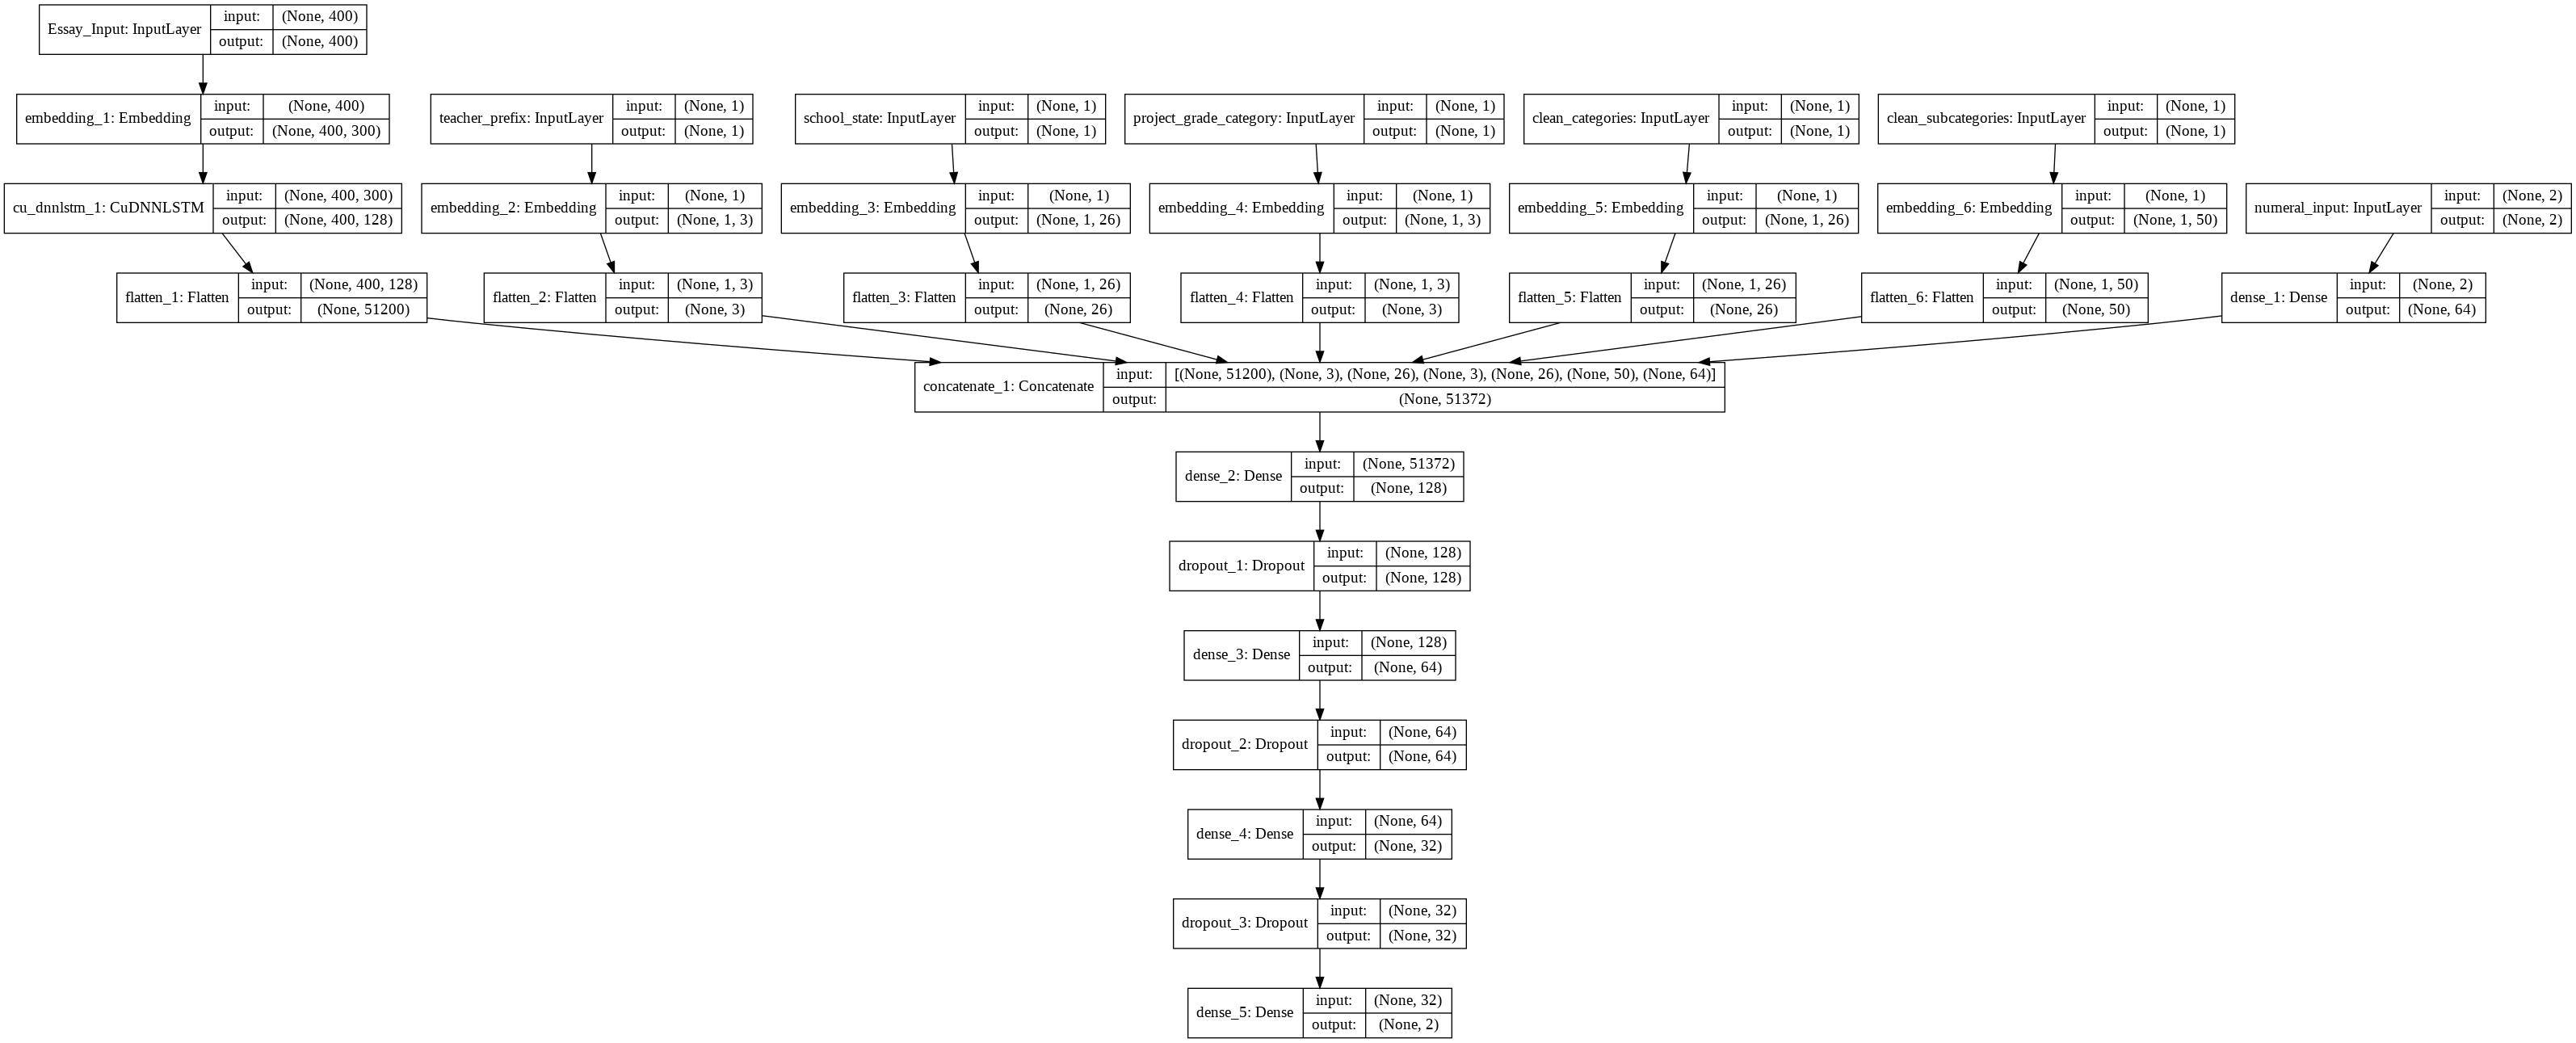

In [0]:
#https://machinelearningmastery.com/visualize-deep-learning-neural-network-model-keras/
plot_model(proto1, to_file='/content/gdrive/My Drive/Colab Notebooks/proto1.png', show_shapes=True, show_layer_names=True)

In [0]:
adam = keras.optimizers.Adam(lr=0.001,beta_1=0.91, beta_2=0.999, epsilon=1e-06)
proto1.compile(optimizer=adam, loss='categorical_crossentropy',metrics=[auroc])
batch_size=300



Instructions for updating:
tf.py_func is deprecated in TF V2. Instead, there are two
    options available in V2.
    - tf.py_function takes a python function which manipulates tf eager
    tensors instead of numpy arrays. It's easy to convert a tf eager tensor to
    an ndarray (just call tensor.numpy()) but having access to eager tensors
    means `tf.py_function`s can use accelerators such as GPUs as well as
    being differentiable using a gradient tape.
    - tf.numpy_function maintains the semantics of the deprecated tf.py_func
    (it is not differentiable, and manipulates numpy arrays). It drops the
    stateful argument making all functions stateful.
    


In [0]:
#https://github.com/taomanwai/tensorboardcolab/
#https://machinelearningmastery.com/check-point-deep-learning-models-keras/

filepath="epochs:{epoch:03d}-val_acc:{val_auroc:.3f}.hdf5"
checkpoint_2 = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, mode='max')
tbc=TensorBoardColab()
earlystopping_2 = EarlyStopping(monitor='val_loss', patience=2, verbose=1)
reduce_lr_2 = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=1, min_lr=0.001,verbose = 1)
callbacks_list = [checkpoint_2,reduce_lr_2,TensorBoardColabCallback(tbc),earlystopping_2]

Wait for 8 seconds...
TensorBoard link:
https://5d6fc046.ngrok.io


In [0]:

proto1_fit= proto1.fit({'Essay_Input': X_Train_padded_SCdocs, 'school_state': sch_one_hot_Train, 'project_grade_category': grade_one_hot_train,'clean_categories': categories_one_hot_Train,'clean_subcategories':sub_categories_one_hot_Train, 'teacher_prefix':prefix_one_hot_Train, 'numeral_input':X_Train_SCNum}, Y_Train,
          epochs=20, batch_size=batch_size,verbose=1, validation_data=({'Essay_Input': X_CV_padded_SCdocs, 'school_state': sch_one_hot_CV, 'project_grade_category': grade_one_hot_CV,'clean_categories': categories_one_hot_CV,'clean_subcategories':sub_categories_one_hot_CV, 'teacher_prefix':prefix_one_hot_CV, 'numeral_input':X_CV_SCNum}, Y_CV),callbacks=callbacks_list)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 61178 samples, validate on 15295 samples


Epoch 1/20
61178/61178 [==============================] - 20s 326us/step - loss: 1.3037 - auroc: 0.5820 - val_loss: 0.7885 - val_auroc: 0.6847

Epoch 00001: saving model to epochs:001-val_acc:0.685.hdf5

Epoch 2/20
61178/61178 [==============================] - 14s 222us/step - loss: 0.6888 - auroc: 0.6203 - val_loss: 0.5906 - val_auroc: 0.7200

Epoch 00002: saving model to epochs:002-val_acc:0.720.hdf5
Epoch 3/20
61178/61178 [==============================] - 14s 222us/step - loss: 0.5697 - auroc: 0.6659 - val_loss: 0.5233 - val_auroc: 0.7370

Epoch 00003: saving model to epochs:003-val_acc:0.737.hdf5
Epoch 4/20
61178/61178 [==============================] - 14s 223us/step - loss: 0.5081 - auroc: 0.7020 - val_loss: 0.4866 - val_auroc: 0.7453

Epoch 00004: saving model to epochs:004-val_acc:0.745.hdf5
Epoch 5/20
61178/61178 [===============

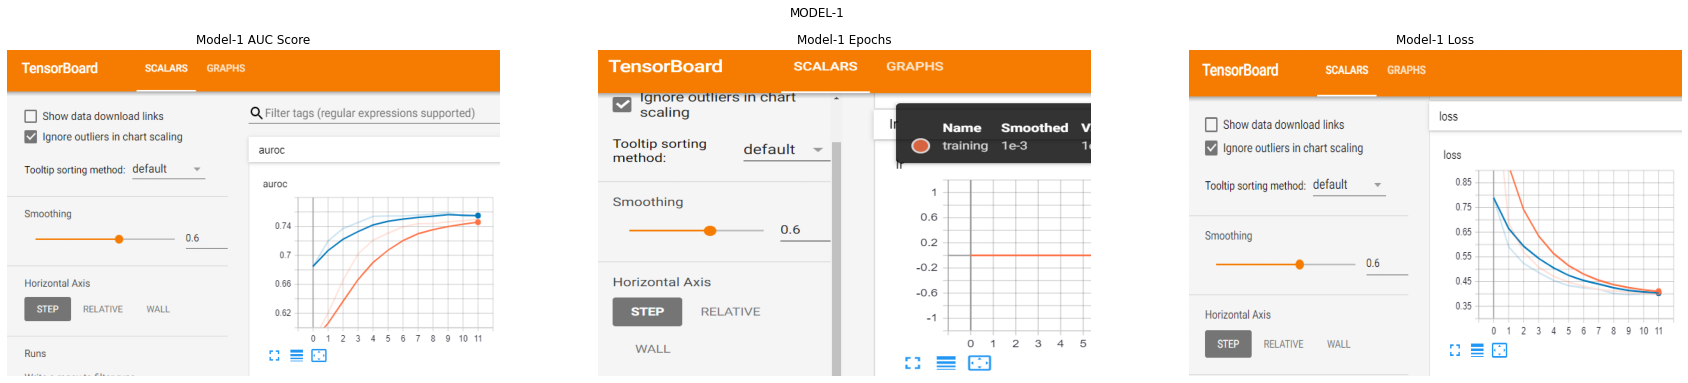

In [0]:
#https://matplotlib.org/gallery/lines_bars_and_markers/errorbar_subsample.html#sphx-glr-gallery-lines-bars-and-markers-errorbar-subsample-py
fig, (Left, Center, Right) = plt.subplots(nrows=1, ncols=3,
                                       sharex=True, figsize=(30, 6))

Left.set_title('Model-1 AUC Score')
image1 = mpimg.imread("/content/gdrive/My Drive/Colab Notebooks/Model1_auroc.PNG")
Left.imshow(image1,aspect='auto')
Left.axis('off')

Center.set_title('Model-1 Epochs')
image2 = mpimg.imread("/content/gdrive/My Drive/Colab Notebooks/Model1_epochs.PNG")
Center.imshow(image2,aspect='auto')
Center.axis('off')

Right.set_title('Model-1 Loss')
image3 = mpimg.imread("/content/gdrive/My Drive/Colab Notebooks/Model1_loss.PNG")
Right.imshow(image3,aspect='auto')
Right.axis('off')

fig.suptitle('MODEL-1')
plt.show()


In [0]:

#https://stackoverflow.com/posts/54978213/revisions
custom_objects = {"auroc":auroc}

In [0]:
from keras.models import load_model
High_proto1 = load_model('epochs:012-val_acc:0.754.hdf5',custom_objects=custom_objects)

In [0]:
Best_Model1 = High_proto1.evaluate({'Essay_Input': X_Test_padded_SCdocs, 'school_state': sch_one_hot_Test, 'project_grade_category': grade_one_hot_Test,'clean_categories': categories_one_hot_Test,'clean_subcategories':sub_categories_one_hot_Test, 'teacher_prefix':prefix_one_hot_Test, 'numeral_input':X_Test_SCNum}, Y_Test,batch_size=batch_size,verbose=1)

32775/32775 [==============================] - 3s 94us/step


In [0]:
print(Best_Model1)

[0.39831846475055616, 0.7528673440676737]


In [0]:
print("Test loss = {}".format (Best_Model1[0]))
print("Test auroc = {}".format (Best_Model1[1]))

Test loss = 0.39831846475055616
Test auroc = 0.7528673440676737


In [0]:
High_proto1.save("/content/gdrive/My Drive/Colab Notebooks/High_proto1.hdf5")

In [0]:
%matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import time
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error
def plt_dynamic(x, vy, ty,  colors=['b']):
    fig,ax = plt.subplots(1,1)
    ax.set_xlabel('epoch') 
    ax.set_ylabel('Roc_AUC Loss')
    ax.plot(x, vy, 'b', label="val_loss")
    ax.plot(x, ty, 'r', label="loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

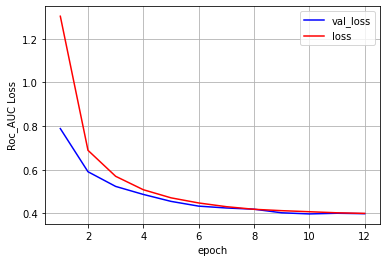

In [0]:
%matplotlib inline
vy = proto1.history.history['val_loss']
ty = proto1.history.history['loss']

x = list(range(1,13))
plt_dynamic(x, vy, ty)

<h2><font color='Blue'>Model 2 - TFIDF Vectorize the Data</font></h2>

In [0]:
vectorizer = TfidfVectorizer(min_df=6,use_idf=True)
vectorizer.fit(X_Train['essay'])

X_Train_essay=vectorizer.transform(X_Train['essay'].values)
X_CV_essay=vectorizer.transform(X_CV['essay'].values)
X_Test_essay=vectorizer.transform(X_Test['essay'].values)


print(X_Train_essay.shape)
print(X_CV_essay.shape)
print(X_Test_essay.shape)


(61178, 16480)
(15295, 16480)
(32775, 16480)


In [0]:
idf_vec = vectorizer.idf_
idf_count = dict(zip(vectorizer.get_feature_names(), idf_vec))
print(idf_count)
df=pd.DataFrame(idf_count.items())
df=df.sort_values(by=1)
df.head()
df.shape

{'00': 7.2175382276272, '000': 5.923484990194217, '00am': 9.942117730680621, '00pm': 9.536652622572456, '03': 9.824334695024238, '10': 4.518821061605606, '100': 3.796323948258789, '1000': 7.138757349774086, '100th': 9.248970550120676, '101': 8.763462734338976, '102': 9.45660991489892, '103': 9.077120293194016, '104': 9.45660991489892, '105': 9.248970550120676, '107': 9.536652622572456, '108': 9.623663999562087, '10th': 6.698549293222048, '11': 5.590228190426978, '110': 7.436591793689885, '1100': 8.802683447492257, '112': 9.623663999562087, '115': 8.977036834637033, '11th': 7.0042794355455325, '12': 4.765262032669776, '120': 6.7851173095305075, '1200': 8.192917875871363, '123': 9.536652622572456, '123s': 9.824334695024238, '125': 8.192917875871363, '126': 10.075649123305144, '127': 9.824334695024238, '12th': 5.993280752129759, '13': 6.0554125332367645, '130': 7.773064030311097, '1300': 9.382501942745199, '131': 10.075649123305144, '133': 10.075649123305144, '135': 9.623663999562087, '13

(16480, 2)

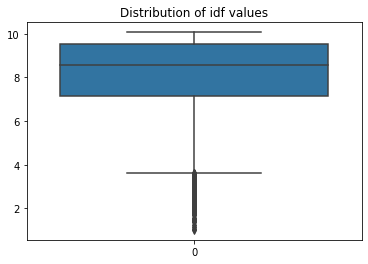

In [0]:
sns.boxplot(data=df[1]).set_title('Distribution of idf values')
plt.show()

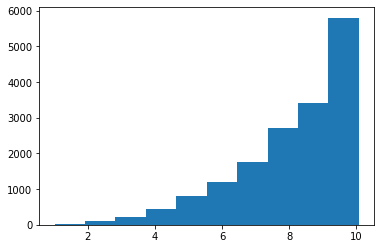

In [0]:
plt.hist(df[1])
plt.show()

In [0]:
iqd_min=df[1].quantile(0.02)
iqd_max=df[1].quantile(0.98)
print(iqd_min)
print(iqd_max)

3.6964955787292597
10.075649123305144


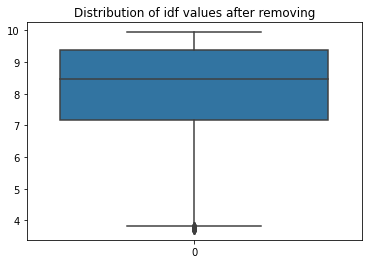

(15135, 2)

In [0]:
df_1 = df[(df[1] > iqd_min) & (df[1] < iqd_max)]
sns.boxplot(data=df_1[1]).set_title('Distribution of idf values after removing')
plt.show()
df_1.shape

In [0]:
df_2 = df[(df[1] <= iqd_min) | (df[1] >= iqd_max)]
remove=list(df_2[0])
len(remove)

1345

In [0]:
def idf_words(data):
    preprocessed_essays = []

    for sent in tqdm(data.values):
        sent = ' '.join(e for e in sent.split() if e.lower() not in remove)
        preprocessed_essays.append(sent.lower().strip())
    return preprocessed_essays

In [0]:
X_Train['essay']=idf_words(X_Train['essay'])
X_CV['essay']=idf_words(X_CV['essay'])
X_Test['essay']=idf_words(X_Test['essay'])

100%|██████████| 32775/32775 [00:34<00:00, 945.86it/s]


In [0]:
#def word_embedding(docs,embeddings_index):
glove_words =  set(embedding_index.keys())


# prepare tokenizer
t = Tokenizer()
t.fit_on_texts(X_Train['essay'].values)
vocab_size = len(t.word_index) + 1

X_Train_encoded_docs = t.texts_to_sequences(X_Train['essay'].values)
X_Test_encoded_docs = t.texts_to_sequences(X_Test['essay'].values)
X_CV_encoded_docs = t.texts_to_sequences(X_CV['essay'].values)

# pad documents to a max length of 300 words
max_length = 400
X_Train_padded_docs = pad_sequences(X_Train_encoded_docs, maxlen=max_length, padding='post')
X_Test_padded_docs = pad_sequences(X_Test_encoded_docs, maxlen=max_length, padding='post')
X_CV_padded_docs = pad_sequences(X_CV_encoded_docs, maxlen=max_length, padding='post')
  
embedding_matrix = zeros((vocab_size, 300))
for word, i in t.word_index.items():
  embedding_vector = embedding_index.get(word)
  if embedding_vector is not None:
    embedding_matrix[i] = embedding_vector
  
print(X_Train_padded_docs.shape)
print(X_CV_padded_docs.shape)
print(X_Test_padded_docs.shape)

(61178, 400)
(15295, 400)
(32775, 400)


In [0]:
X_Train_padded_SCdocs = X_Train_padded_docs
X_CV_padded_SCdocs = X_CV_padded_docs
X_Test_padded_SCdocs = X_Test_padded_docs

In [0]:
K.clear_session()

In [0]:
ip_layer = []
con_layer = []

In [0]:
#for cat in categorical_field:
print(categorical_field)

['teacher_prefix', 'school_state', 'project_grade_category', 'clean_categories', 'clean_subcategories']


In [0]:
ess_ip = Input(shape=(max_length,), name = "Essay_Input")
ip_layer.append(ess_ip)
Emb_Layer = Embedding(vocab_size, 300, weights=[embedding_matrix], input_length=max_length,trainable=False)(ess_ip)
Lstm_Layer= CuDNNLSTM(128,kernel_initializer='he_normal',kernel_regularizer=l2(0.001),return_sequences=True)(Emb_Layer)
Flat_Layer= Flatten()(Lstm_Layer)
con_layer.append(Flat_Layer)

for cat in categorical_field:
    x = Input((1,), name=cat)
    ip_layer.append(x)
    x = Embedding(categorical_sizes[cat]+1, categorical_embsizes[cat], input_length=1)(x)
    x = Flatten()(x)
    con_layer.append(x)

numeral_input=Input(shape=(X_Train_SCNum.shape[1],),name='numeral_input')
ip_layer.append(numeral_input)
numeral_input_dense = Dense(64, activation='relu',kernel_initializer='he_normal',kernel_regularizer=l2(0.001))(numeral_input)
con_layer.append(numeral_input_dense)


In [0]:
tf.keras.layers.concatenate
Model2 = concatenate(con_layer)
Model2= Dense(128, activation='relu',kernel_initializer='he_normal',kernel_regularizer=l2(0.001))(Model2)
Model2= Dropout(0.5)(Model2)
Model2= Dense(64, activation='relu',kernel_initializer='he_normal',kernel_regularizer=l2(0.001))(Model2)
Model2= Dropout(0.5)(Model2)
Model2= Dense(32, activation='relu',kernel_initializer='he_normal',kernel_regularizer=l2(0.001))(Model2)
Model2= Dropout(0.5)(Model2)
output=Dense(2, activation='softmax')(Model2)
proto2 = Model(inputs=ip_layer, outputs=output)

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
proto2.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Essay_Input (InputLayer)        (None, 400)          0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 400, 300)     13163700    Essay_Input[0][0]                
__________________________________________________________________________________________________
teacher_prefix (InputLayer)     (None, 1)            0                                            
__________________________________________________________________________________________________
school_state (InputLayer)       (None, 1)            0                                            
____________________________________________________________________________________________

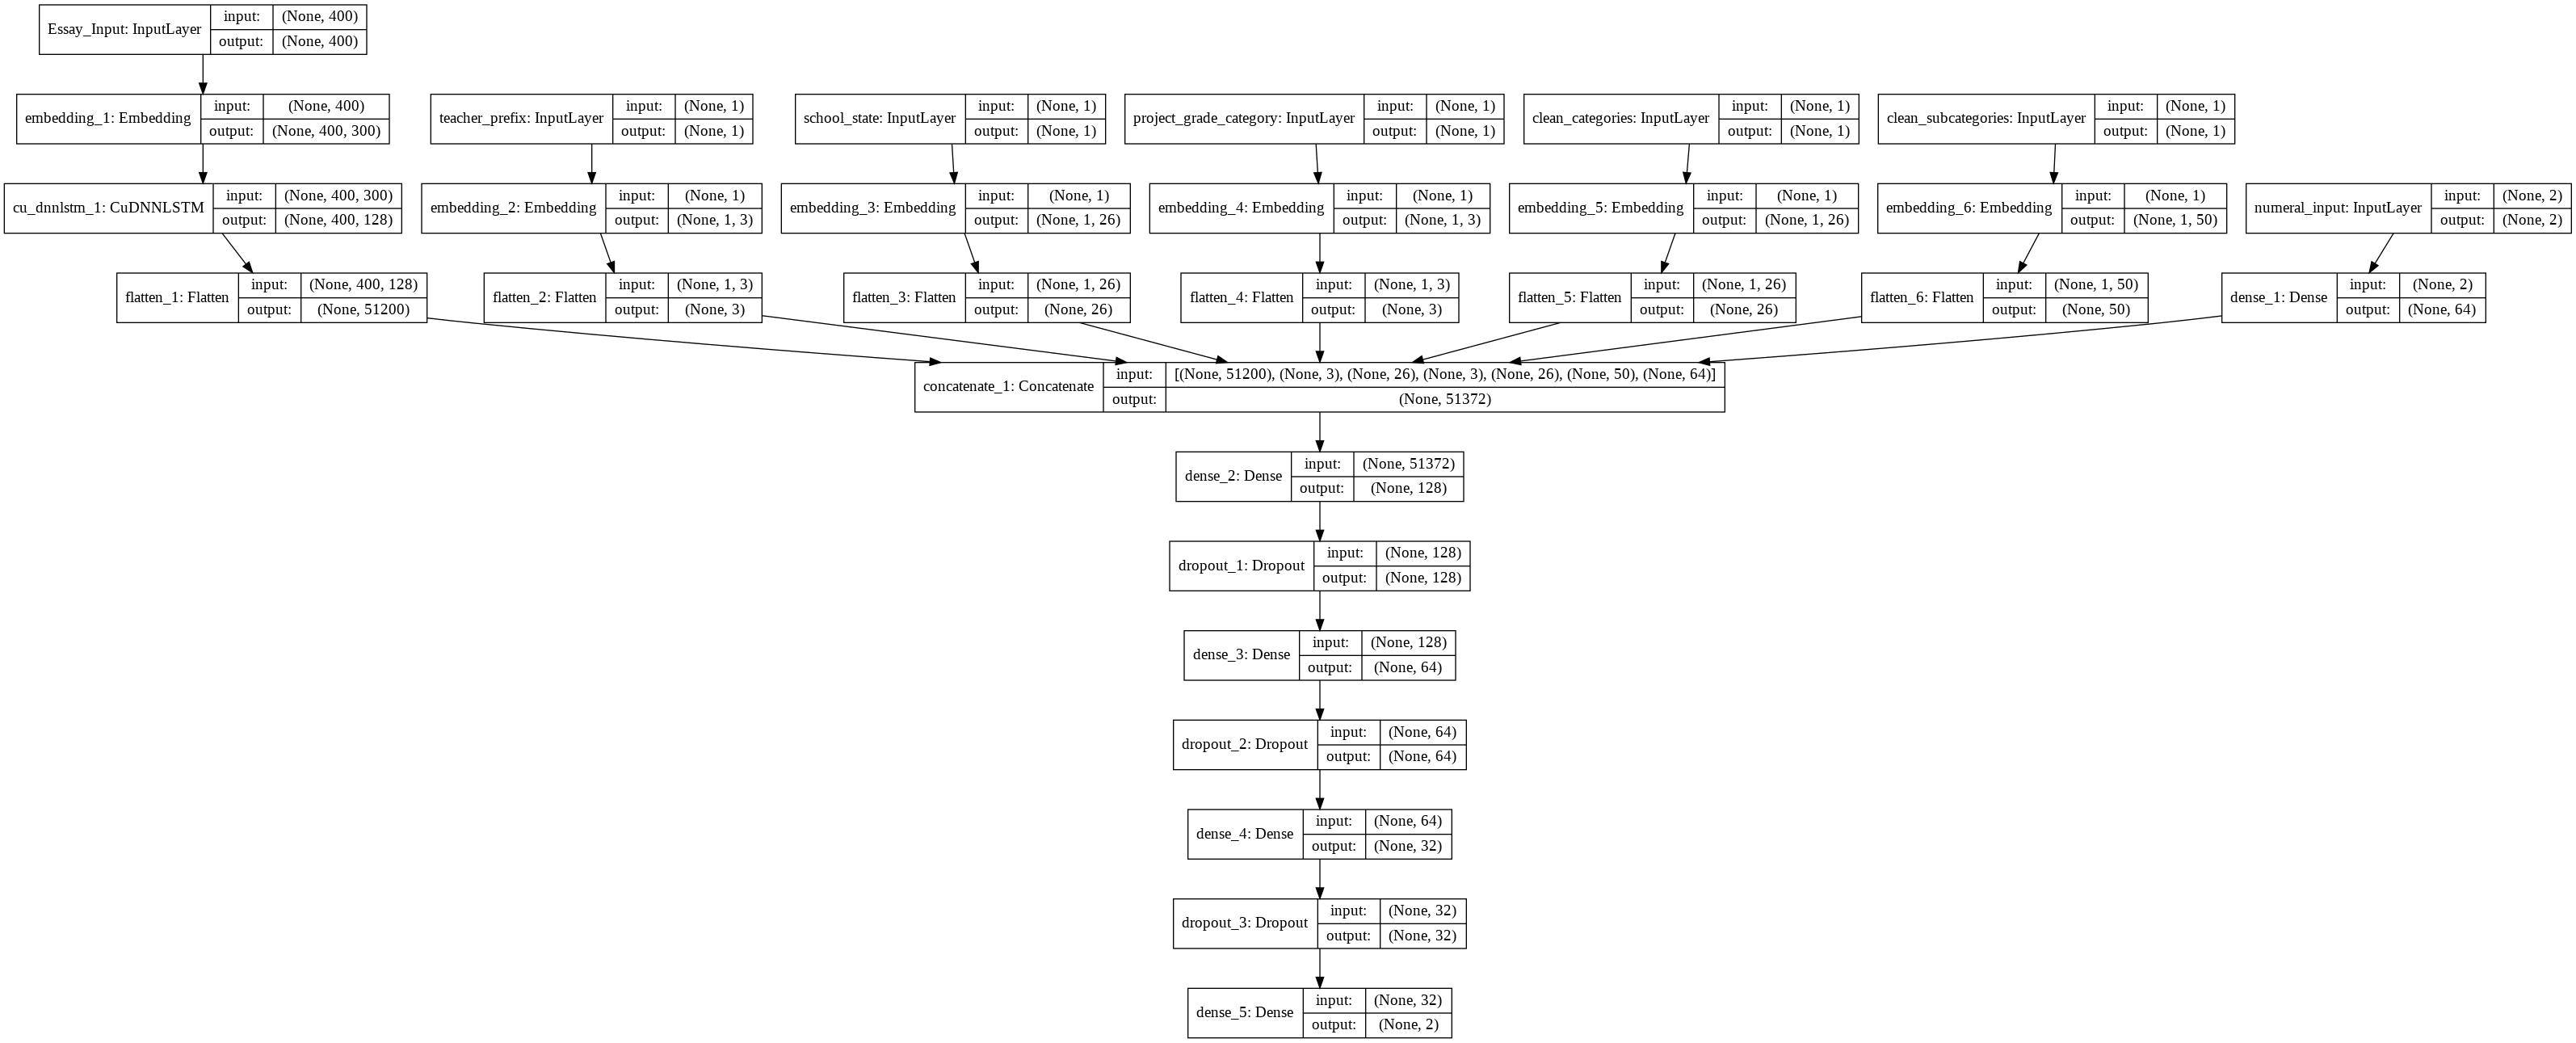

In [0]:
#https://machinelearningmastery.com/visualize-deep-learning-neural-network-model-keras/
plot_model(proto2, to_file='/content/gdrive/My Drive/Colab Notebooks/proto2.png', show_shapes=True, show_layer_names=True)

In [0]:
adam = keras.optimizers.Adam(lr=0.001,beta_1=0.91, beta_2=0.999, epsilon=1e-06)
proto2.compile(optimizer=adam, loss='categorical_crossentropy',metrics=[auroc])
batch_size=300



Instructions for updating:
tf.py_func is deprecated in TF V2. Instead, there are two
    options available in V2.
    - tf.py_function takes a python function which manipulates tf eager
    tensors instead of numpy arrays. It's easy to convert a tf eager tensor to
    an ndarray (just call tensor.numpy()) but having access to eager tensors
    means `tf.py_function`s can use accelerators such as GPUs as well as
    being differentiable using a gradient tape.
    - tf.numpy_function maintains the semantics of the deprecated tf.py_func
    (it is not differentiable, and manipulates numpy arrays). It drops the
    stateful argument making all functions stateful.
    


In [0]:
#https://github.com/taomanwai/tensorboardcolab/
#https://machinelearningmastery.com/check-point-deep-learning-models-keras/

filepath="epochs:{epoch:03d}-val_acc:{val_auroc:.3f}.hdf5"
checkpoint_2 = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, mode='max')
tbc=TensorBoardColab()
earlystopping_2 = EarlyStopping(monitor='val_loss', patience=2, verbose=1)
reduce_lr_2 = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=1, min_lr=0.001,verbose = 1)
callbacks_list = [checkpoint_2,reduce_lr_2,TensorBoardColabCallback(tbc),earlystopping_2]

Wait for 8 seconds...
TensorBoard link:
https://7acffcf8.ngrok.io


In [0]:
proto2_fit= proto2.fit({'Essay_Input': X_Train_padded_SCdocs, 'school_state': sch_one_hot_Train, 'project_grade_category': grade_one_hot_train,'clean_categories': categories_one_hot_Train,'clean_subcategories':sub_categories_one_hot_Train, 'teacher_prefix':prefix_one_hot_Train, 'numeral_input':X_Train_SCNum}, Y_Train,
          epochs=20, batch_size=batch_size,verbose=1, validation_data=({'Essay_Input': X_CV_padded_SCdocs, 'school_state': sch_one_hot_CV, 'project_grade_category': grade_one_hot_CV,'clean_categories': categories_one_hot_CV,'clean_subcategories':sub_categories_one_hot_CV, 'teacher_prefix':prefix_one_hot_CV, 'numeral_input':X_CV_SCNum}, Y_CV),callbacks=callbacks_list)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 61178 samples, validate on 15295 samples


Epoch 1/20
61178/61178 [==============================] - 20s 324us/step - loss: 1.1096 - auroc: 0.6066 - val_loss: 0.6842 - val_auroc: 0.6995

Epoch 00001: saving model to epochs:001-val_acc:0.699.hdf5

Epoch 2/20
61178/61178 [==============================] - 14s 222us/step - loss: 0.6087 - auroc: 0.6462 - val_loss: 0.5458 - val_auroc: 0.7167

Epoch 00002: saving model to epochs:002-val_acc:0.717.hdf5
Epoch 3/20
61178/61178 [==============================] - 14s 222us/step - loss: 0.5216 - auroc: 0.6763 - val_loss: 0.5011 - val_auroc: 0.7206

Epoch 00003: saving model to epochs:003-val_acc:0.721.hdf5
Epoch 4/20
61178/61178 [==============================] - 14s 221us/step - loss: 0.4803 - auroc: 0.6947 - val_loss: 0.4720 - val_auroc: 0.7270

Epoch 00004: saving model to epochs:004-val_acc:0.727.hdf5
Epoch 5/20
61178/61178 [===============

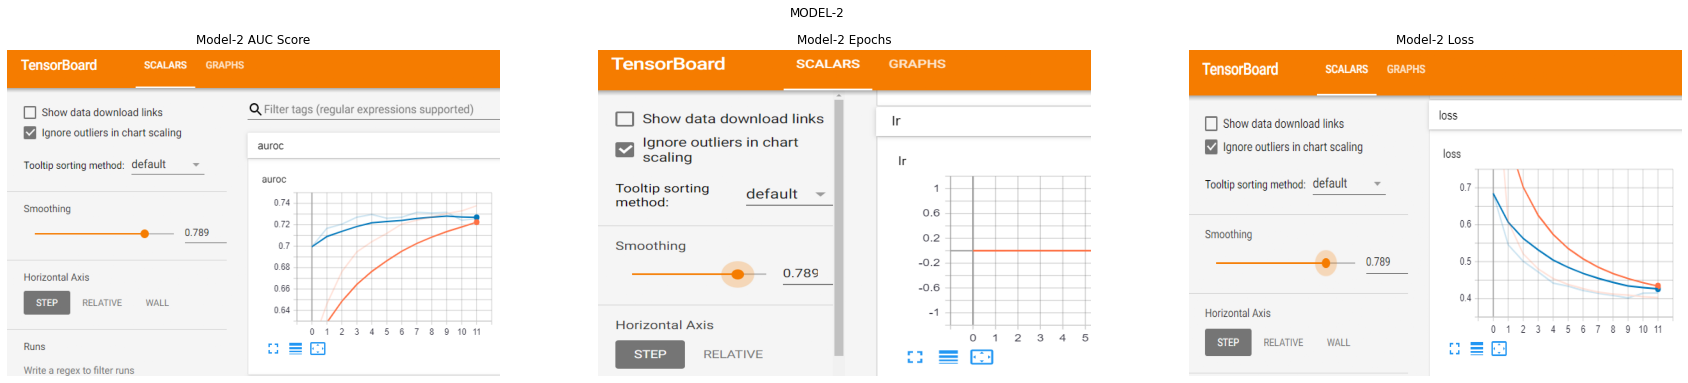

In [0]:
#https://matplotlib.org/gallery/lines_bars_and_markers/errorbar_subsample.html#sphx-glr-gallery-lines-bars-and-markers-errorbar-subsample-py
fig, (Left, Center, Right) = plt.subplots(nrows=1, ncols=3,
                                       sharex=True, figsize=(30, 6))

Left.set_title('Model-2 AUC Score')
image1 = mpimg.imread("/content/gdrive/My Drive/Colab Notebooks/Model2_auroc.PNG")
Left.imshow(image1,aspect='auto')
Left.axis('off')

Center.set_title('Model-2 Epochs')
image2 = mpimg.imread("/content/gdrive/My Drive/Colab Notebooks/Model2_epochs.PNG")
Center.imshow(image2,aspect='auto')
Center.axis('off')

Right.set_title('Model-2 Loss')
image3 = mpimg.imread("/content/gdrive/My Drive/Colab Notebooks/Model2_loss.PNG")
Right.imshow(image3,aspect='auto')
Right.axis('off')

fig.suptitle('MODEL-2')
plt.show()


In [0]:

#https://stackoverflow.com/posts/54978213/revisions
custom_objects = {"auroc":auroc}

In [0]:
from keras.models import load_model
High_proto2 = load_model('epochs:012-val_acc:0.726.hdf5',custom_objects=custom_objects)

In [0]:
Best_Model2 = High_proto2.evaluate({'Essay_Input': X_Test_padded_SCdocs, 'school_state': sch_one_hot_Test, 'project_grade_category': grade_one_hot_Test,'clean_categories': categories_one_hot_Test,'clean_subcategories':sub_categories_one_hot_Test, 'teacher_prefix':prefix_one_hot_Test, 'numeral_input':X_Test_SCNum}, Y_Test,batch_size=batch_size,verbose=1)

32775/32775 [==============================] - 3s 86us/step


In [0]:
print(Best_Model2)

[0.41110836293386377, 0.7261467914225028]


In [0]:
print("Test loss = {}".format (Best_Model2[0]))
print("Test auroc = {}".format (Best_Model2[1]))

Test loss = 0.41110836293386377
Test auroc = 0.7261467914225028


In [0]:
High_proto2.save("/content/gdrive/My Drive/Colab Notebooks/High_proto2.hdf5")

In [0]:
%matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import time
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error
def plt_dynamic(x, vy, ty,  colors=['b']):
    fig,ax = plt.subplots(1,1)
    ax.set_xlabel('epoch') 
    ax.set_ylabel('Roc_AUC Loss')
    ax.plot(x, vy, 'b', label="val_loss")
    ax.plot(x, ty, 'r', label="loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

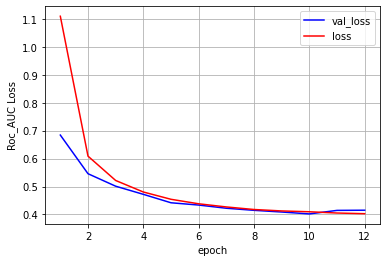

In [0]:
%matplotlib inline
vy = proto2.history.history['val_loss']
ty = proto2.history.history['loss']

x = list(range(1,13))
plt_dynamic(x, vy, ty)

<h2><font color='Blue'>Model 3 - Conv1D</font></h2>

In [0]:
# we use count vectorizer to convert the values into one
# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in X_Train['clean_categories'].values:
    my_counter.update(word.split())
cat_dict = dict(my_counter)
sorted_cat_dict_Train = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))
print(len(sorted_cat_dict_Train))
print(sorted_cat_dict_Train)


vectorizer = CountVectorizer(vocabulary=list(sorted_cat_dict_Train.keys()), lowercase=False, binary=True)
vectorizer.fit(X_Train['clean_categories'].values)
categories_one_hot_Train = vectorizer.transform(X_Train['clean_categories'].values)
categories_one_hot_CV = vectorizer.transform(X_CV['clean_categories'].values)
categories_one_hot_Test = vectorizer.transform(X_Test['clean_categories'].values)
print("Shape of categories_one_hot_Train matrix after one hot encodig ",categories_one_hot_Train.shape)
print("Shape of categories_one_hot_CV matrix after one hot encodig ",categories_one_hot_CV.shape)
print("Shape of categories_one_hot_Test matrix after one hot encodig ",categories_one_hot_Test.shape)

9
{'warmth': 794, 'care_hunger': 794, 'history_civics': 3210, 'music_arts': 5708, 'appliedlearning': 6876, 'specialneeds': 7701, 'health_sports': 8045, 'math_science': 23150, 'literacy_language': 29216}
Shape of categories_one_hot_Train matrix after one hot encodig  (61178, 9)
Shape of categories_one_hot_CV matrix after one hot encodig  (15295, 9)
Shape of categories_one_hot_Test matrix after one hot encodig  (32775, 9)


In [0]:
# we use count vectorizer to convert the values into one 
# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in X_Train['clean_subcategories'].values:
    my_counter.update(word.split())
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict_Train = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))
print(sorted_sub_cat_dict_Train)
print(len(sorted_sub_cat_dict_Train))

vectorizer = CountVectorizer(vocabulary=list(sorted_sub_cat_dict_Train.keys()), lowercase=False, binary=True)
vectorizer.fit(X_Train['clean_subcategories'].values)
sub_categories_one_hot_Train = vectorizer.transform(X_Train['clean_subcategories'].values)
sub_categories_one_hot_CV = vectorizer.transform(X_CV['clean_subcategories'].values)
sub_categories_one_hot_Test = vectorizer.transform(X_Test['clean_subcategories'].values)
print("Shape of Sub_categories_one_hot_Train matrix after one hot encodig ",sub_categories_one_hot_Train.shape)
print("Shape of Sub_categories_one_hot_CV matrix after one hot encodig ",sub_categories_one_hot_CV.shape)
print("Shape of Sub_categories_one_hot_Test matrix after one hot encodig ",sub_categories_one_hot_Test.shape)

{'economics': 141, 'communityservice': 235, 'financialliteracy': 306, 'parentinvolvement': 385, 'civics_government': 443, 'extracurricular': 457, 'foreignlanguages': 489, 'nutritioneducation': 757, 'warmth': 794, 'care_hunger': 794, 'socialsciences': 1053, 'performingarts': 1102, 'charactereducation': 1146, 'teamsports': 1171, 'other': 1374, 'college_careerprep': 1467, 'history_geography': 1705, 'music': 1727, 'health_lifescience': 2365, 'earlydevelopment': 2408, 'esl': 2499, 'gym_fitness': 2588, 'environmentalscience': 3108, 'visualarts': 3501, 'health_wellness': 5812, 'appliedsciences': 6121, 'specialneeds': 7701, 'literature_writing': 12293, 'mathematics': 15662, 'literacy': 18894}
30
Shape of Sub_categories_one_hot_Train matrix after one hot encodig  (61178, 30)
Shape of Sub_categories_one_hot_CV matrix after one hot encodig  (15295, 30)
Shape of Sub_categories_one_hot_Test matrix after one hot encodig  (32775, 30)


**School State**

In [0]:
# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter_sch = Counter()
for word in X_Train['school_state'].values:
    my_counter_sch.update(word.split())

# dict sort by value python: https://stackoverflow.com/a/613218/4084039
sch_dict = dict(my_counter_sch)
sorted_sch_dict = dict(sorted(sch_dict.items(), key=lambda kv: kv[1]))

vectorizer = CountVectorizer(vocabulary=list(sorted_sch_dict.keys()), lowercase=False, binary=True)
vectorizer.fit(X_Train['school_state'].values)
sch_one_hot_Train = vectorizer.transform(X_Train['school_state'].values)
sch_one_hot_CV = vectorizer.transform(X_CV['school_state'].values)
sch_one_hot_Test = vectorizer.transform(X_Test['school_state'].values)

print("Shape of sch_one_hot_Train matrix after one hot encodig ",sch_one_hot_Train.shape)
print("Shape of sch_one_hot_CV matrix after one hot encodig ",sch_one_hot_CV.shape)
print("Shape of sch_one_hot_Test matrix after one hot encodig ",sch_one_hot_Test.shape)



Shape of sch_one_hot_Train matrix after one hot encodig  (61178, 51)
Shape of sch_one_hot_CV matrix after one hot encodig  (15295, 51)
Shape of sch_one_hot_Test matrix after one hot encodig  (32775, 51)


**Prefix**

In [0]:
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039
# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter_prefix_Train = Counter()
for word in X_Train['teacher_prefix'].values:
    my_counter_prefix_Train.update(word.split())

# dict sort by value python: https://stackoverflow.com/a/613218/4084039
prefix_dict_Train = dict(my_counter_prefix_Train)
sorted_prefix_dict_Train = dict(sorted(prefix_dict_Train.items(), key=lambda kv: kv[1]))

vectorizer = CountVectorizer(vocabulary=list(sorted_prefix_dict_Train.keys()), lowercase=False, binary=True)
vectorizer.fit(X_Train['teacher_prefix'].values)
prefix_one_hot_Train = vectorizer.transform(X_Train['teacher_prefix'].values)
prefix_one_hot_CV = vectorizer.transform(X_CV['teacher_prefix'].values)
prefix_one_hot_Test = vectorizer.transform(X_Test['teacher_prefix'].values)

print("Shape of prefix_one_hot_Train matrix after one hot encodig ",prefix_one_hot_Train.shape)
print("Shape of prefix_one_hot_CV matrix after one hot encodig ",prefix_one_hot_CV.shape)
print("Shape of prefix_one_hot_Test matrix after one hot encodig ",prefix_one_hot_Test.shape)


Shape of prefix_one_hot_Train matrix after one hot encodig  (61178, 5)
Shape of prefix_one_hot_CV matrix after one hot encodig  (15295, 5)
Shape of prefix_one_hot_Test matrix after one hot encodig  (32775, 5)


**project_grade_category**

In [0]:
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039
# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter_grade_train = Counter()
for word in X_Train['project_grade_category'].values:
    my_counter_grade_train.update(word.split())
grade_dict_Train = dict(my_counter_grade_train)
sorted_grade_dict_Train = dict(sorted(grade_dict_Train.items(), key=lambda kv: kv[1]))

vectorizer = CountVectorizer(vocabulary=list(sorted_grade_dict_Train.keys()), lowercase=False, binary=True)
vectorizer.fit(X_Train['project_grade_category'].values)
grade_one_hot_train = vectorizer.transform(X_Train['project_grade_category'].values)
grade_one_hot_CV = vectorizer.transform(X_CV['project_grade_category'].values)
grade_one_hot_Test = vectorizer.transform(X_Test['project_grade_category'].values)


print("Shape of grade_one_hot_train matrix after one hot encodig ",grade_one_hot_train.shape)
print("Shape of grade_one_hot_CV matrix after one hot encodig ",grade_one_hot_CV.shape)
print("Shape of grade_one_hot_Test matrix after one hot encodig ",grade_one_hot_Test.shape)

Shape of grade_one_hot_train matrix after one hot encodig  (61178, 4)
Shape of grade_one_hot_CV matrix after one hot encodig  (15295, 4)
Shape of grade_one_hot_Test matrix after one hot encodig  (32775, 4)


**Price data**

In [0]:
price_norm = Normalizer(norm='l2', copy=False)
price_norm.fit(X_Train['price'].values.reshape(1,-1))

price_norm.transform(X_Train['price'].values.reshape(1,-1))
price_norm.transform(X_CV['price'].values.reshape(1,-1))
price_norm.transform(X_Test['price'].values.reshape(1,-1))

price_norm_Train = (X_Train['price'].values.reshape(-1,1))
price_norm_CV = (X_CV['price'].values.reshape(-1,1))
price_norm_Test = (X_Test['price'].values.reshape(-1,1))

print("Shape of price_norm_Train matrix after one hot encodig ",price_norm_Train.shape)
print("Shape of price_norm_CV matrix after one hot encodig ",price_norm_CV.shape)
print("Shape of price_norm_Test matrix after one hot encodig ",price_norm_Test.shape)

Shape of price_norm_Train matrix after one hot encodig  (61178, 1)
Shape of price_norm_CV matrix after one hot encodig  (15295, 1)
Shape of price_norm_Test matrix after one hot encodig  (32775, 1)


**teacher_number_of_previously_posted_projects**

In [0]:
teacher_prev_post_norm = Normalizer(norm='l2', copy=False)
teacher_prev_post_norm.fit(X_Train['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))

teacher_prev_post_norm_Train = teacher_prev_post_norm.transform(X_Train['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))
teacher_prev_post_norm_CV = teacher_prev_post_norm.transform(X_CV['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))
teacher_prev_post_norm_Test = teacher_prev_post_norm.transform(X_Test['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))

teacher_prev_post_norm_Train = (X_Train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
teacher_prev_post_norm_CV = (X_CV['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
teacher_prev_post_norm_Test = (X_Test['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
print("Shape of teacher_prev_post_norm_Train matrix after one hot encodig ",teacher_prev_post_norm_Train.shape)
print("Shape of teacher_prev_post_norm_CV matrix after one hot encodig ",teacher_prev_post_norm_CV.shape)
print("Shape of teacher_prev_post_norm_Test matrix after one hot encodig ",teacher_prev_post_norm_Test.shape)

Shape of teacher_prev_post_norm_Train matrix after one hot encodig  (61178, 1)
Shape of teacher_prev_post_norm_CV matrix after one hot encodig  (15295, 1)
Shape of teacher_prev_post_norm_Test matrix after one hot encodig  (32775, 1)


In [0]:
X_Train_Num=np.concatenate((teacher_prev_post_norm_Train,price_norm_Train),axis=1)
X_CV_Num=np.concatenate((teacher_prev_post_norm_CV,price_norm_CV),axis=1)
X_Test_Num=np.concatenate((teacher_prev_post_norm_Test,price_norm_Test),axis=1)


print(X_Train_Num.shape)
print(X_CV_Num.shape)
print(X_Test_Num.shape)

(61178, 2)
(15295, 2)
(32775, 2)


In [0]:
X_Train_HSTK = hstack((categories_one_hot_Train, sub_categories_one_hot_Train, sch_one_hot_Train,prefix_one_hot_Train,grade_one_hot_train, X_Train_Num)).todense()
X_CV_HSTK = hstack((categories_one_hot_CV, sub_categories_one_hot_CV, sch_one_hot_CV,prefix_one_hot_CV,grade_one_hot_CV, X_CV_Num)).todense()
X_Test_HSTK = hstack((categories_one_hot_Test, sub_categories_one_hot_Test, sch_one_hot_Test,prefix_one_hot_Test,grade_one_hot_Test, X_Test_Num)).todense()
print(X_Train_HSTK.shape, Y_Train.shape)
print(X_CV_HSTK.shape, Y_CV.shape)
print(X_Test_HSTK.shape, Y_Test.shape)

(61178, 101) (61178, 2)
(15295, 101) (15295, 2)
(32775, 101) (32775, 2)


In [0]:
X_Train_HSCR = np.array(X_Train_HSTK).reshape(X_Train_HSTK.shape[0],X_Train_HSTK.shape[1],1)
X_CV_HSCR = np.array(X_CV_HSTK).reshape(X_CV_HSTK.shape[0],X_CV_HSTK.shape[1],1)
X_Test_HSCR = np.array(X_Test_HSTK).reshape(X_Test_HSTK.shape[0],X_Test_HSTK.shape[1],1)

In [0]:
X_Train_padded_SCdocs = X_Train_padded_SCdocs_BU
X_CV_padded_SCdocs = X_CV_padded_SCdocs_BU
X_Test_padded_SCdocs = X_Test_padded_SCdocs_BU


In [0]:
print(X_Train_HSCR.shape)

(61178, 101, 1)


In [0]:
K.clear_session()

In [0]:

C_N_train = Input(shape=(X_Train_HSCR.shape[1],1), name="C_N_train")
cat_num_input=Conv1D(256,3, activation='relu',kernel_initializer='he_normal',padding='same')(C_N_train)
cat_num_input=MaxPooling1D(pool_size=2)(cat_num_input)

cat_num_input=Conv1D(128,3, activation='relu',kernel_initializer='he_normal',padding='same')(cat_num_input)
cat_num_input=MaxPooling1D(pool_size=2)(cat_num_input)

cat_num_input=Conv1D(64,3, activation='relu',kernel_initializer='he_normal',padding='same')(cat_num_input)
cat_num_input=MaxPooling1D(pool_size=2)(cat_num_input)

cat_num_input=Conv1D(32,3, activation='relu',kernel_initializer='he_normal',padding='same')(cat_num_input)
cat_num_input=MaxPooling1D(pool_size=3)(cat_num_input)

cat_num_input=Conv1D(16,3, activation='relu',kernel_initializer='he_normal',padding='same')(cat_num_input)
cat_num_input=MaxPooling1D(pool_size=2)(cat_num_input)

cat_num_input=Conv1D(8,3, activation='relu',kernel_initializer='he_normal',padding='same')(cat_num_input)
cat_num_input=MaxPooling1D(pool_size=2)(cat_num_input)

cat_num_input = Flatten()(cat_num_input)

ess_ip = Input(shape=(max_length,), name = "Essay_Input")
Emb_Layer = Embedding(vocab_size, 300, weights=[embedding_matrix], input_length=max_length,trainable=False)(ess_ip)

Cu_Layer= CuDNNLSTM(128,kernel_initializer='he_normal',kernel_regularizer=l2(0.001),return_sequences=True)(Emb_Layer)
Flat_Layer= Flatten()(Cu_Layer)


In [0]:
tf.keras.layers.concatenate
Model3 = concatenate([Flat_Layer,cat_num_input])
Model3= Dense(128, activation='relu',kernel_initializer='he_normal',kernel_regularizer=l2(0.001))(Model3)
Model3= Dropout(0.5)(Model3)
Model3= Dense(64, activation='relu',kernel_initializer='he_normal',kernel_regularizer=l2(0.001))(Model3)
Model3= Dropout(0.5)(Model3)
Model3= Dense(32, activation='relu',kernel_initializer='he_normal',kernel_regularizer=l2(0.001))(Model3)
Model3= Dropout(0.5)(Model3)
output=Dense(2, activation='softmax')(Model3)
proto3 = Model(inputs=[ess_ip,C_N_train], outputs=output)

In [0]:
proto3.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
C_N_train (InputLayer)          (None, 101, 1)       0                                            
__________________________________________________________________________________________________
conv1d_1 (Conv1D)               (None, 101, 256)     1024        C_N_train[0][0]                  
__________________________________________________________________________________________________
max_pooling1d_1 (MaxPooling1D)  (None, 50, 256)      0           conv1d_1[0][0]                   
__________________________________________________________________________________________________
conv1d_2 (Conv1D)               (None, 50, 128)      98432       max_pooling1d_1[0][0]            
____________________________________________________________________________________________

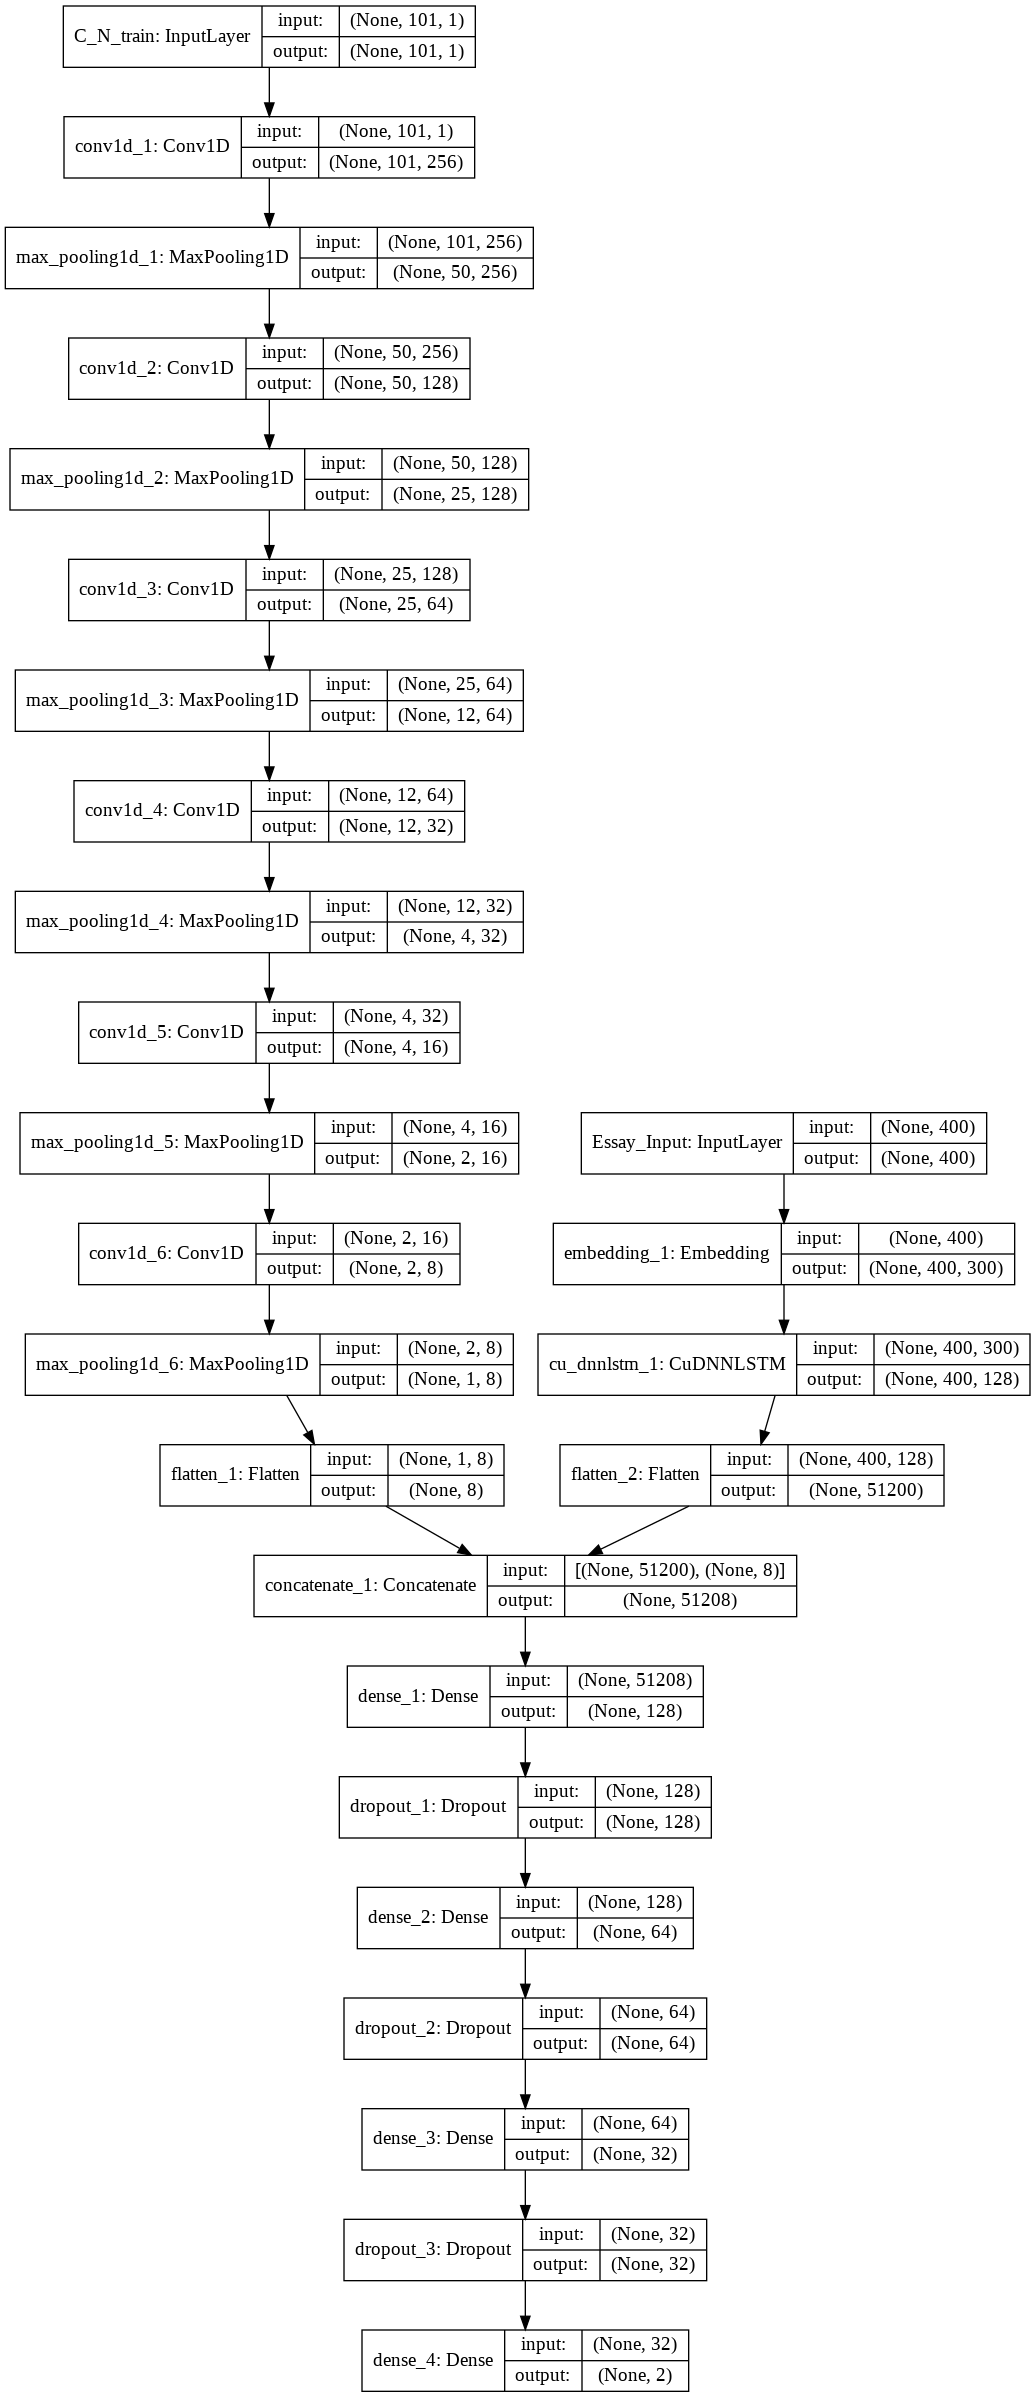

In [0]:
#https://machinelearningmastery.com/visualize-deep-learning-neural-network-model-keras/
plot_model(proto3, to_file='/content/gdrive/My Drive/Colab Notebooks/proto3.png', show_shapes=True, show_layer_names=True)

In [0]:
adam = keras.optimizers.Adam(lr=0.001,beta_1=0.91, beta_2=0.999, epsilon=1e-06)
proto3.compile(optimizer=adam, loss='categorical_crossentropy',metrics=[auroc])

batch_size=300

In [0]:
#https://github.com/taomanwai/tensorboardcolab/
#https://machinelearningmastery.com/check-point-deep-learning-models-keras/


filepath="epochs:{epoch:03d}-val_acc:{val_auroc:.3f}.hdf5"

checkpoint_2 = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, mode='max')
tbc=TensorBoardColab()
earlystopping_2 = EarlyStopping(monitor='val_loss', patience=2, verbose=1)

reduce_lr_2 = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=1, min_lr=0.001,verbose = 1)
callbacks_list = [checkpoint_2,reduce_lr_2,TensorBoardColabCallback(tbc),earlystopping_2]

Wait for 8 seconds...
TensorBoard link:
https://7acffcf8.ngrok.io


In [0]:
proto3_fit= proto3.fit({'Essay_Input': X_Train_padded_SCdocs, 'C_N_train':X_Train_HSCR},Y_Train,
          epochs=20, batch_size=batch_size,verbose=1, validation_data=({'Essay_Input': X_CV_padded_SCdocs, 'C_N_train': X_CV_HSCR},Y_CV),callbacks=callbacks_list)

Train on 61178 samples, validate on 15295 samples
Epoch 1/20
61178/61178 [==============================] - 17s 275us/step - loss: 1.1373 - auroc: 0.5475 - val_loss: 0.6604 - val_auroc: 0.6440

Epoch 00001: saving model to epochs:001-val_acc:0.644.hdf5
Epoch 2/20
61178/61178 [==============================] - 16s 258us/step - loss: 0.5926 - auroc: 0.5980 - val_loss: 0.5231 - val_auroc: 0.6664

Epoch 00002: saving model to epochs:002-val_acc:0.666.hdf5
Epoch 3/20
61178/61178 [==============================] - 16s 258us/step - loss: 0.5145 - auroc: 0.6233 - val_loss: 0.4830 - val_auroc: 0.6650

Epoch 00003: saving model to epochs:003-val_acc:0.665.hdf5
Epoch 4/20
61178/61178 [==============================] - 16s 258us/step - loss: 0.4812 - auroc: 0.6309 - val_loss: 0.4563 - val_auroc: 0.6680

Epoch 00004: saving model to epochs:004-val_acc:0.668.hdf5
Epoch 5/20
61178/61178 [==============================] - 16s 257us/step - loss: 0.4578 - auroc: 0.6489 - val_loss: 0.4515 - val_auroc: 0.

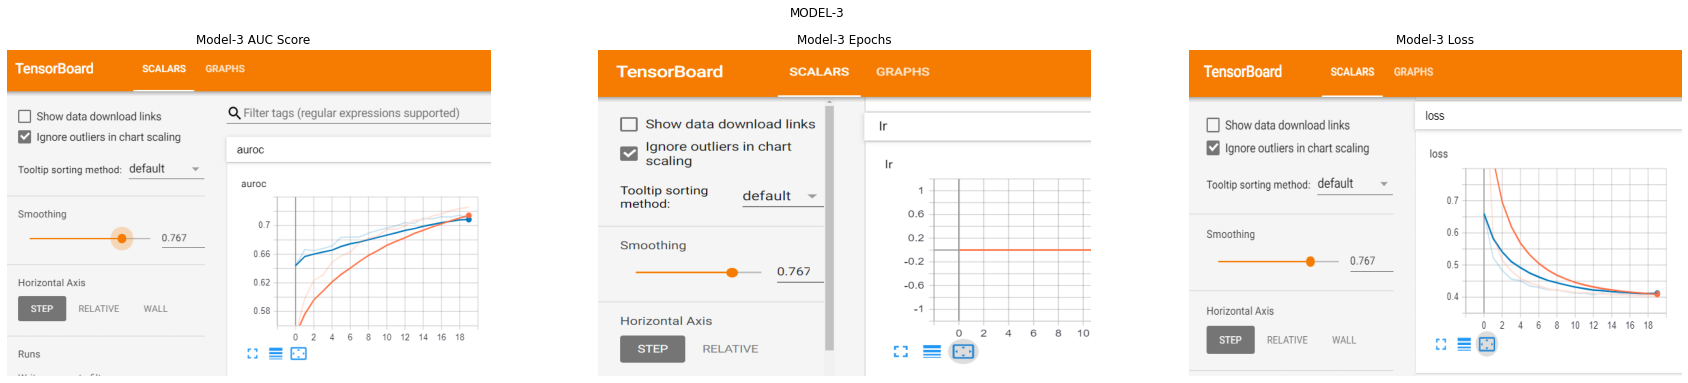

In [0]:
#https://matplotlib.org/gallery/lines_bars_and_markers/errorbar_subsample.html#sphx-glr-gallery-lines-bars-and-markers-errorbar-subsample-py
fig, (Left, Center, Right) = plt.subplots(nrows=1, ncols=3,
                                       sharex=True, figsize=(30, 6))

Left.set_title('Model-3 AUC Score')
image1 = mpimg.imread("/content/gdrive/My Drive/Colab Notebooks/Model3_auroc.PNG")
Left.imshow(image1,aspect='auto')
Left.axis('off')

Center.set_title('Model-3 Epochs')
image2 = mpimg.imread("/content/gdrive/My Drive/Colab Notebooks/Model3_epochs.PNG")
Center.imshow(image2,aspect='auto')
Center.axis('off')

Right.set_title('Model-3 Loss')
image3 = mpimg.imread("/content/gdrive/My Drive/Colab Notebooks/Model3_loss.PNG")
Right.imshow(image3,aspect='auto')
Right.axis('off')

fig.suptitle('MODEL-3')
plt.show()


In [0]:

#https://stackoverflow.com/posts/54978213/revisions
custom_objects = {"auroc":auroc}

In [0]:
from keras.models import load_model
High_proto3 = load_model('epochs:020-val_acc:0.710.hdf5',custom_objects=custom_objects)

In [0]:
Best_Model3 = High_proto3.evaluate({'Essay_Input': X_Test_padded_SCdocs, 'C_N_train':X_Test_HSCR},Y_Test,batch_size=batch_size,verbose=1)

32775/32775 [==============================] - 3s 101us/step


In [0]:
print(Best_Model3)

[0.4094283440293109, 0.713127805292282]


In [0]:
print("Test loss = {}".format (Best_Model3[0]))
print("Test auroc = {}".format (Best_Model3[1]))

Test loss = 0.4094283440293109
Test auroc = 0.713127805292282


In [0]:
High_proto3.save("/content/gdrive/My Drive/Colab Notebooks/High_proto3.hdf5")

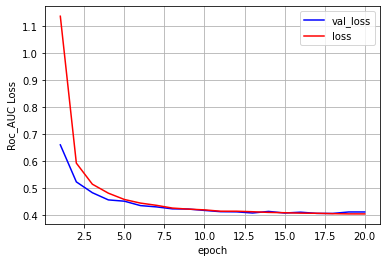

In [0]:
%matplotlib inline
vy = proto3.history.history['val_loss']
ty = proto3.history.history['loss']

x = list(range(1,21))

plt_dynamic(x, vy, ty)

<h2><font color='Blue'>Conclusion:</font></h2>

In [0]:
pt = PrettyTable()
pt.field_names= ("S.No","Model No","AUC Score")
pt.add_row(["1","MODEL-1", "0.75"])
pt.add_row(["2","MODEL-2", "0.73"])
pt.add_row(["3","MODEL-3", "0.71"])
print(pt)

+------+----------+-----------+
| S.No | Model No | AUC Score |
+------+----------+-----------+
|  1   | MODEL-1  |    0.75   |
|  2   | MODEL-2  |    0.73   |
|  3   | MODEL-3  |    0.71   |
+------+----------+-----------+
